## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

## Load dataset (MNIST dataset is included in keras dataset)

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train.shape

(60000, 28, 28)

0


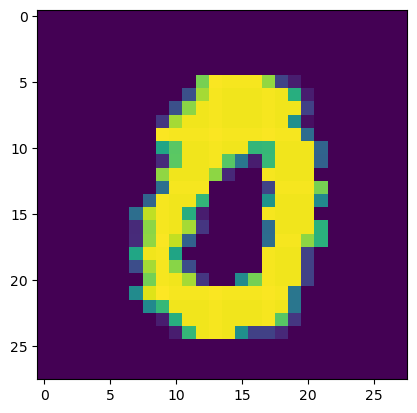

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[69])

print(y_train[69])

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Create and train ANN model

In [10]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9196 - loss: 0.2776 - val_accuracy: 0.9595 - val_loss: 0.1466
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9653 - loss: 0.1152 - val_accuracy: 0.9660 - val_loss: 0.1162
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9751 - loss: 0.0807 - val_accuracy: 0.9722 - val_loss: 0.0964
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9823 - loss: 0.0573 - val_accuracy: 0.9688 - val_loss: 0.1078
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9855 - loss: 0.0455 - val_accuracy: 0.9712 - val_loss: 0.1063
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9886 - loss: 0.0356 - val_accuracy: 0.9743 - val_loss: 0.0970
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9897 - loss: 0.0303 - val_accuracy: 0.9759 - val_loss: 0.1038
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9916 - loss: 0.0251 - 

In [15]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


## Accuracy

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9765

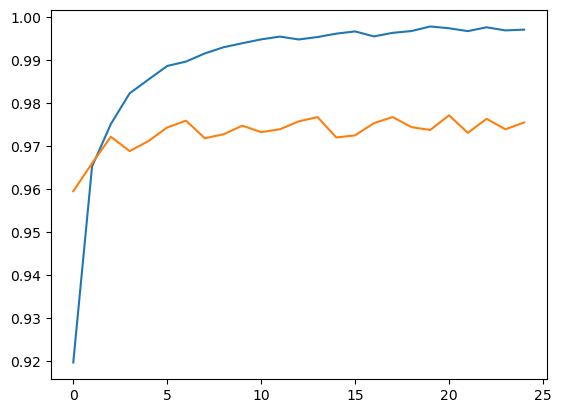

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])